In [1]:
import pandas as pd

In [2]:
risk_df=pd.read_csv('../pcms_hackathon_data/train/risk.csv')

In [3]:
risk_df.head(3)

,patient_id,risk_score
0,291,0.51
1,306,0.61
2,310,11.70


In [4]:
risk_df.risk_score.max()

np.float64(68.38)

In [5]:
risk_df.shape

(8000, 2)

In [6]:
len(risk_df.patient_id.unique())

8000

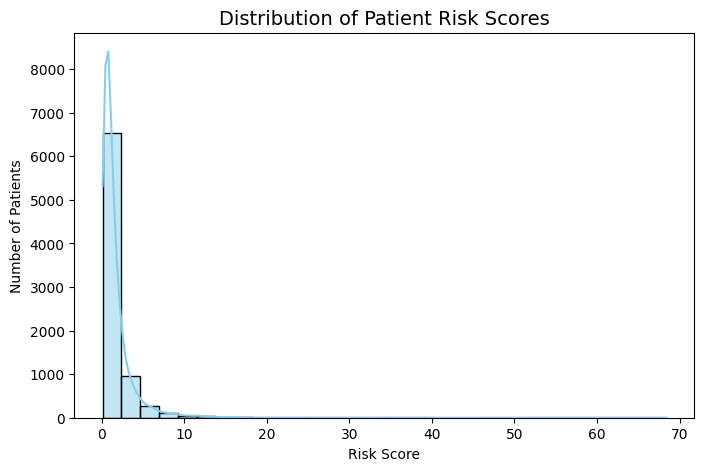

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(risk_df['risk_score'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Patient Risk Scores', fontsize=14)
plt.xlabel('Risk Score')
plt.ylabel('Number of Patients')
plt.show()


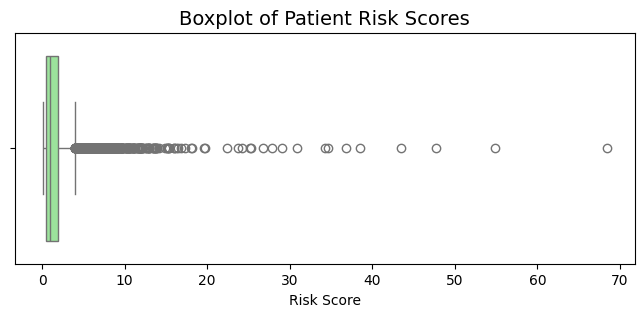

In [8]:
plt.figure(figsize=(8,3))
sns.boxplot(x=risk_df['risk_score'], color='lightgreen')
plt.title('Boxplot of Patient Risk Scores', fontsize=14)
plt.xlabel('Risk Score')
plt.show()


In [9]:
risk_df['risk_score'].describe()


count    8000.000000
mean        1.682857
std         2.515532
min         0.120000
25%         0.530000
50%         0.990000
75%         1.920000
max        68.380000
Name: risk_score, dtype: float64

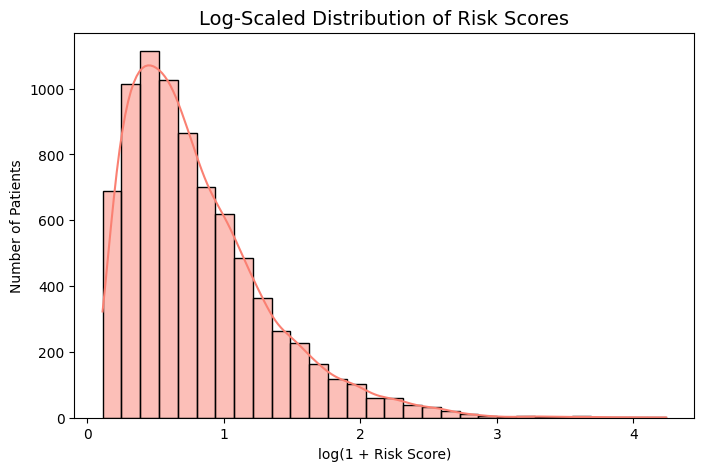

In [10]:
import numpy as np

plt.figure(figsize=(8,5))
sns.histplot(np.log1p(risk_df['risk_score']), bins=30, kde=True, color='salmon')
plt.title('Log-Scaled Distribution of Risk Scores', fontsize=14)
plt.xlabel('log(1 + Risk Score)')
plt.ylabel('Number of Patients')
plt.show()


C:\Users\palla\AppData\Local\Temp\ipykernel_15336\2116232027.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='risk_group', data=risk_df, palette='pastel', order=['Low Risk','Medium Risk','High Risk'])


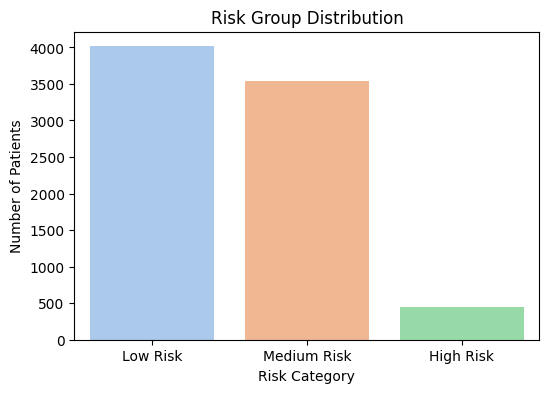

In [11]:
def categorize_risk(score):
    if score < 1:
        return 'Low Risk'
    elif score < 5:
        return 'Medium Risk'
    else:
        return 'High Risk'

risk_df['risk_group'] = risk_df['risk_score'].apply(categorize_risk)

plt.figure(figsize=(6,4))
sns.countplot(x='risk_group', data=risk_df, palette='pastel', order=['Low Risk','Medium Risk','High Risk'])
plt.title('Risk Group Distribution')
plt.xlabel('Risk Category')
plt.ylabel('Number of Patients')
plt.show()


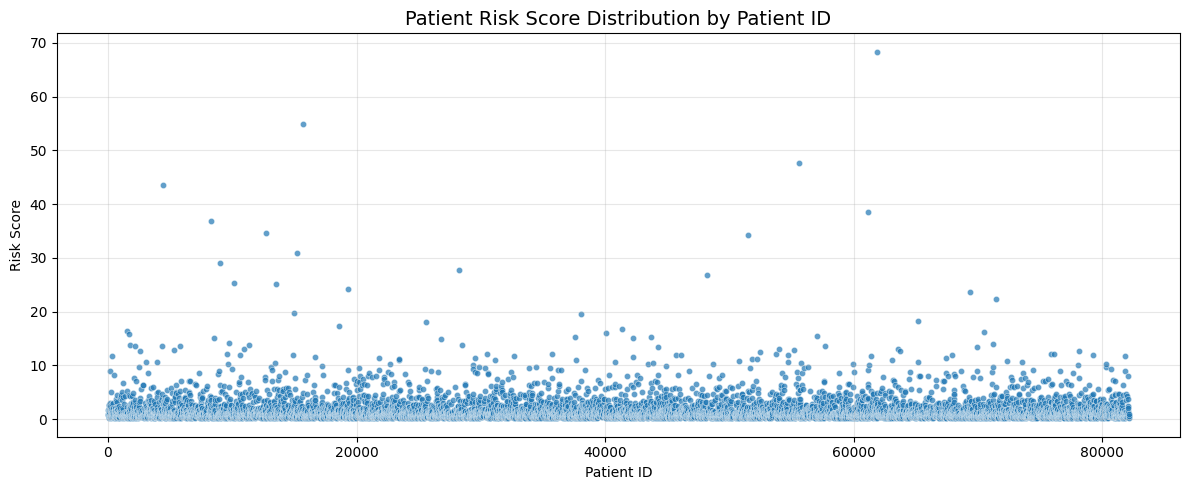

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by patient_id for a clean X-axis
risk_plot_df = risk_df.sort_values('patient_id')

plt.figure(figsize=(12, 5))
sns.scatterplot(
    data=risk_plot_df,
    x='patient_id',
    y='risk_score',
    s=20,
    alpha=0.7
)
plt.title('Patient Risk Score Distribution by Patient ID', fontsize=14)
plt.xlabel('Patient ID')
plt.ylabel('Risk Score')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [13]:
risk_df[risk_df.patient_id==345]

,patient_id,risk_score,risk_group
8,345,1.69,Medium Risk


In [14]:
min_id = risk_df['patient_id'].min()
max_id = risk_df['patient_id'].max()

print(f"Patient ID range: {min_id} → {max_id}")


Patient ID range: 1 → 82152
